In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
from tqdm import tqdm
import random

In [56]:
df1=pd.read_excel('ex2data1-logistic.xls')

In [57]:
df1.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [58]:
df1=df1.drop(columns=['y'])

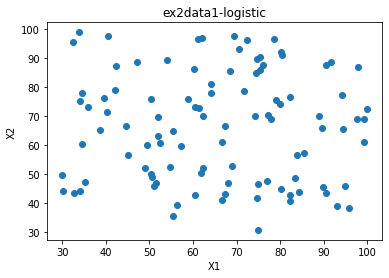

In [59]:
plt.scatter(df1['x1'],df1['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('ex2data1-logistic')
plt.show()

In [60]:
df2=pd.read_excel('kmeans_data.xlsx',names=['x1', 'x2'])

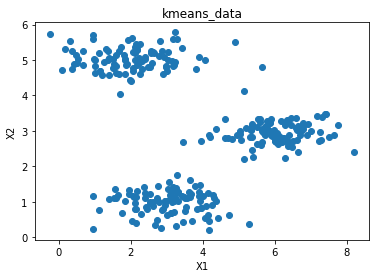

In [61]:
plt.scatter(df2['x1'],df2['x2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('kmeans_data')
plt.show()

In [62]:
data=np.array(df1)
data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])
data[:,1]=(data[:,1]-np.mean(data[:,1]))/np.std(data[:,1])

In [63]:
reps=100
max_iter=1000

  0%|          | 0/10 [00:00<?, ?it/s]

[[-2.03725925e-16  8.59312621e-16]]


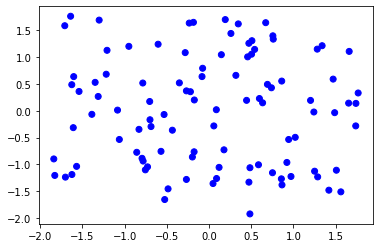

 10%|█         | 1/10 [00:00<00:03,  2.89it/s]

[[-0.11502712 -0.91650488]
 [ 0.10200518  0.81274961]]


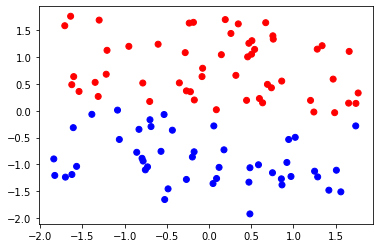

 20%|██        | 2/10 [00:00<00:02,  2.74it/s]

[[-1.02894874  0.03482445]
 [ 0.56078345 -1.13568266]
 [ 0.68453998  0.83828864]]


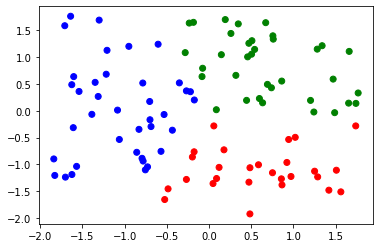

 30%|███       | 3/10 [00:01<00:02,  2.48it/s]

[[-0.68403273  0.93939522]
 [-0.84716128 -0.8105308 ]
 [ 0.87335401 -1.05956989]
 [ 0.91827531  0.68123302]]


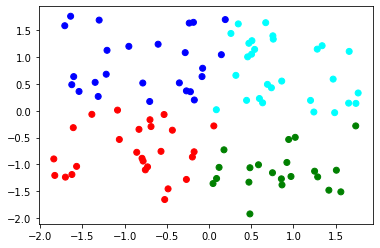

 40%|████      | 4/10 [00:01<00:02,  2.13it/s]

[[-1.31337227  0.66702809]
 [-0.78448259 -0.85556147]
 [ 0.82960227 -1.15214252]
 [ 0.31640356  0.92452421]
 [ 1.55046458  0.24077324]]


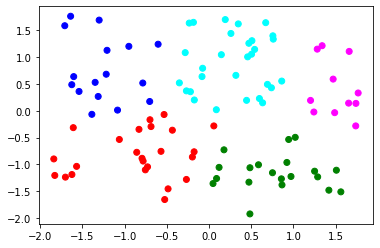

 50%|█████     | 5/10 [00:02<00:02,  1.92it/s]

[[ 0.67361844 -1.1923546 ]
 [-1.02509564 -1.06802677]
 [-1.33767044  0.96603767]
 [ 1.14108257  0.31068101]
 [-0.54308787  0.09457987]
 [ 0.32733609  1.35726558]]


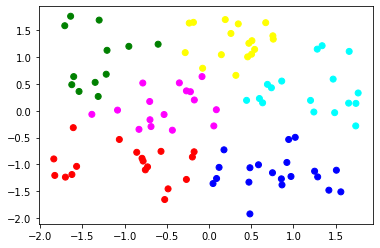

 60%|██████    | 6/10 [00:03<00:02,  1.65it/s]

[[ 0.86848863 -1.14015917]
 [-0.56125812 -0.71579348]
 [ 0.99520886  0.27148525]
 [-1.65012639 -0.85095377]
 [ 0.55715011  1.33814411]
 [-1.33997519  1.02954221]
 [-0.42536832  0.49300365]]


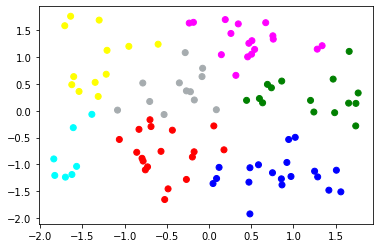

 70%|███████   | 7/10 [00:04<00:02,  1.49it/s]

[[-0.24295133 -1.15204676]
 [-0.396204    0.00999534]
 [-1.510195   -0.9001994 ]
 [ 1.55046458  0.24077324]
 [-0.07277138  1.39809171]
 [-1.33601369  0.7724192 ]
 [ 0.61233552  0.89101098]
 [ 1.03007398 -1.11288364]]


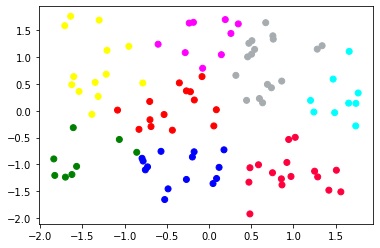

 80%|████████  | 8/10 [00:05<00:01,  1.35it/s]

[[ 0.96108264 -1.17749312]
 [-0.53650675 -0.72993424]
 [-1.3966909  -1.12578124]
 [ 0.46041893  0.17198494]
 [ 1.53684635  0.13223937]
 [ 0.37086733  1.37661539]
 [-0.35442994  0.59056967]
 [ 1.42646976  1.15861148]
 [-1.40303162  0.85691496]]


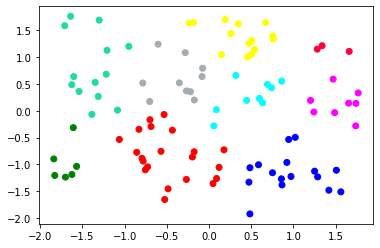

 90%|█████████ | 9/10 [00:05<00:00,  1.28it/s]

[[-1.71124953 -1.115055  ]
 [-0.06414524 -0.03063933]
 [-1.2936755   0.9869598 ]
 [ 0.30306009  1.28322389]
 [-0.93968058 -0.15502832]
 [ 1.01390186  0.06150462]
 [ 0.43941907 -1.23721146]
 [ 1.55807666  0.66867005]
 [-0.63979885 -1.10104301]
 [ 1.21429715 -1.29420693]]


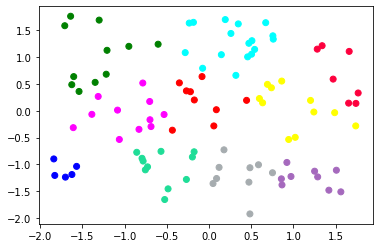

100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


In [64]:
sse=[]
kk=[]
for k in tqdm(range(1,11)):
    mini_error = math.inf
    for xx in range(reps):
        #randomly choosing k centroids
        centroids = data[random.sample(range(0,len(data)),k)]
        for yy in range(max_iter):
            #key are going to be centroid's index and value is going to be points belonging to that cluster
            classifications = {}
            #initialisating with empty array
            for i in range(k):
                classifications[i] = []

            for x in data:
                #array of the distances between point and centroid
                distances = [np.linalg.norm(x-centroids[centroid]) for centroid in range(len(centroids))]
                #classify to the cluster with whose centroid x has minimum distance        
                classifications[np.argmin(distances)].append(x)

            #recomputing centroid
            prev_centroids = centroids
            for classification in classifications:
                if len(classifications[classification])>0:
                    centroids[classification] = np.average(classifications[classification],axis=0)
                else:
                    centroids[classification] = data[random.sample(range(0,len(data)),k)]
            if(max(np.linalg.norm(prev_centroids-centroids,axis=0))<1e-4):
                break
            
        #calculating sum of squared error
        error=0
        for i in range(k):
            for x in classifications[i]:
                error = error + np.square(x-centroids[i]).sum()
        if error<mini_error:
            mini_error = error
            best_centroids = centroids
    print(best_centroids)
    kk.append(k)
    sse.append(mini_error)
    #for visualisation
    tmp = []
    for x in data:
        distances = [np.linalg.norm(x-best_centroids[centroid]) for centroid in range(len(best_centroids))]
        #classify to the cluster with whose centroid x has minimum distance        
        tmp.append(np.argmin(distances))
        
    df1['Cluster'] = tmp
    ##Scatter Plot Frequency Vs Recency
    Colors = np.array(['blue','red','green','cyan','magenta','yellow','#A6ACAF','#FD003D','#1FDD97','#A569BD'])
    plt.scatter(data[:,0],data[:,1],color = Colors[tmp])
    plt.show()

In [65]:
plt.plot(kk,sse,'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title("Elbow Method for data 2")

Text(0.5, 1.0, 'Elbow Method for data 2')

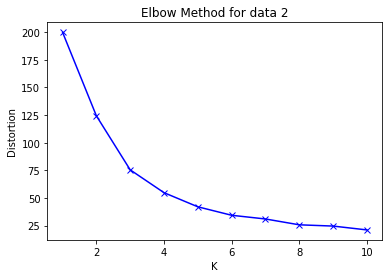

In [66]:
plt.show()

In [67]:
data=np.array(df2)
data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])
data[:,1]=(data[:,1]-np.mean(data[:,1]))/np.std(data[:,1])

In [68]:
reps=100
max_iter=1000

  0%|          | 0/10 [00:00<?, ?it/s]

[[1.52980564e-16 3.63885807e-17]]


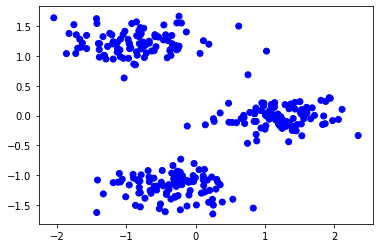

 10%|█         | 1/10 [00:00<00:06,  1.39it/s]

[[ 0.43249259 -0.59495945]
 [-0.88705112  1.22027398]]


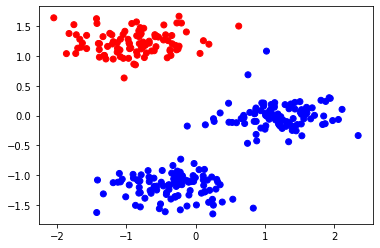

 20%|██        | 2/10 [00:01<00:06,  1.28it/s]

[[-0.88705112  1.22027398]
 [ 1.21389952 -0.00536156]
 [-0.34117765 -1.17871974]]


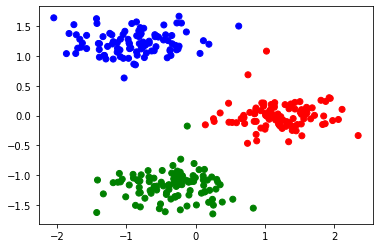

 30%|███       | 3/10 [00:02<00:06,  1.13it/s]

[[ 1.21389952 -0.00536156]
 [-0.34117765 -1.17871974]
 [-0.56653868  1.23769623]
 [-1.37192892  1.19391724]]


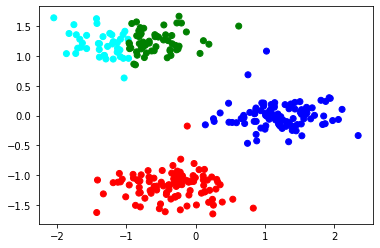

 40%|████      | 4/10 [00:04<00:06,  1.03s/it]

[[-0.59596235  1.23869909]
 [ 1.24455998 -0.00236875]
 [-1.41101091  1.18710878]
 [-0.82716287 -1.18514609]
 [-0.05902125 -1.12782091]]


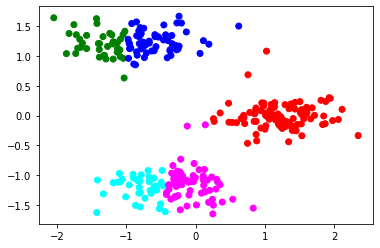

 50%|█████     | 5/10 [00:05<00:05,  1.18s/it]

[[-0.78951999 -1.21146393]
 [-0.04718267 -1.15724814]
 [-1.50198954  1.24111524]
 [-0.67143063  1.20822779]
 [ 0.91737521  0.02801462]
 [ 1.60011725 -0.01535374]]


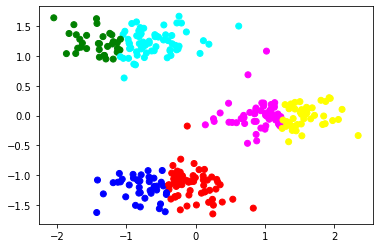

 60%|██████    | 6/10 [00:07<00:05,  1.35s/it]

[[-1.40174143  1.22257696]
 [ 0.69087454  0.10625799]
 [ 1.60468522  0.09334023]
 [ 1.16327147 -0.13193337]
 [-0.60805197  1.21431617]
 [-0.82876505 -1.19574262]
 [-0.07112924 -1.16929169]]


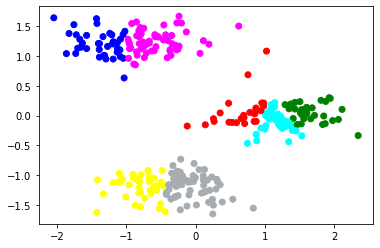

 70%|███████   | 7/10 [00:09<00:04,  1.52s/it]

[[-1.42339567  1.21292577]
 [-0.80220795  1.2025333 ]
 [ 1.18685724  0.0248164 ]
 [-0.09571475 -1.18987888]
 [ 0.64231874 -0.11202058]
 [-0.22012834  1.26549888]
 [ 1.74324236  0.02731673]
 [-0.86968928 -1.18632701]]


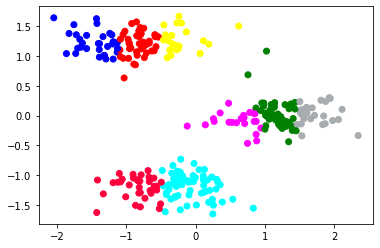

 80%|████████  | 8/10 [00:11<00:03,  1.68s/it]

[[-0.89706749  1.19059177]
 [-0.20880079  1.25339459]
 [ 1.11587049 -0.03110712]
 [ 0.71750504  0.04324321]
 [-0.84880958 -1.23173724]
 [-1.60611994  1.27427587]
 [-0.26991971 -1.06713871]
 [ 1.59216903 -0.01990834]
 [ 0.18801546 -1.29167459]]


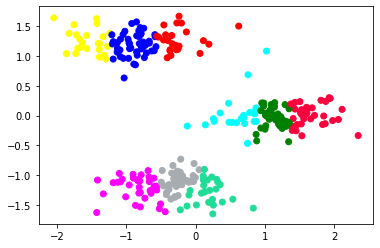

 90%|█████████ | 9/10 [00:13<00:01,  1.85s/it]

[[ 1.39349198 -0.10506378]
 [-1.01247916  1.1766686 ]
 [-1.68639716  1.31326506]
 [ 1.77703743  0.06330083]
 [-0.84724514 -1.17652435]
 [-0.27749887 -1.19242657]
 [ 1.03660543 -0.0155397 ]
 [ 0.51896419  0.06389615]
 [ 0.19593078 -1.19880608]
 [-0.35409129  1.24821336]]


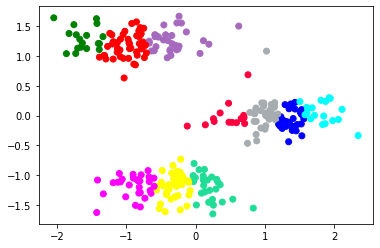

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


In [69]:
sse=[]
kk=[]
for k in tqdm(range(1,11)):
    mini_error = math.inf
    for xx in range(reps):
        #randomly choosing k centroids
        centroids = data[random.sample(range(0,len(data)),k)]
        for yy in range(max_iter):
            #key are going to be centroid's index and value is going to be points belonging to that cluster
            classifications = {}
            #initialisating with empty array
            for i in range(k):
                classifications[i] = []

            for x in data:
                #array of the distances between point and centroid
                distances = [np.linalg.norm(x-centroids[centroid]) for centroid in range(len(centroids))]
                #classify to the cluster with whose centroid x has minimum distance        
                classifications[np.argmin(distances)].append(x)

            #recomputing centroid
            prev_centroids = centroids
            for classification in classifications:
                if len(classifications[classification])>0:
                    centroids[classification] = np.average(classifications[classification],axis=0)
                else:
                    centroids[classification] = data[random.sample(range(0,len(data)),k)]
            if(max(np.linalg.norm(prev_centroids-centroids,axis=0))<1e-4):
                break
            
        #calculating sum of squared error
        error=0
        for i in range(k):
            for x in classifications[i]:
                error = error + np.square(x-centroids[i]).sum()
        if error<mini_error:
            mini_error = error
            best_centroids = centroids
    print(best_centroids)
    kk.append(k)
    sse.append(mini_error)
    #for visualisation
    tmp = []
    for x in data:
        distances = [np.linalg.norm(x-best_centroids[centroid]) for centroid in range(len(best_centroids))]
        #classify to the cluster with whose centroid x has minimum distance        
        tmp.append(np.argmin(distances))
        
    df2['Cluster'] = tmp
    #scatter plot for visualisation
    Colors = np.array(['blue','red','green','cyan','magenta','yellow','#A6ACAF','#FD003D','#1FDD97','#A569BD'])
    plt.scatter(data[:,0],data[:,1],color = Colors[tmp])
    plt.show()

In [70]:
plt.plot(kk,sse,'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title("Elbow Method for data 2")

Text(0.5, 1.0, 'Elbow Method for data 2')

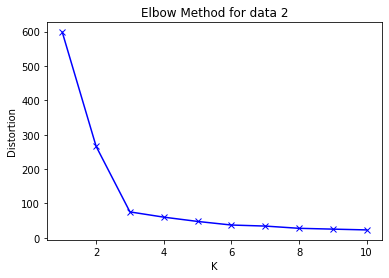

In [71]:
plt.show()